              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.75      1.00      0.86         3
           8       0.33      1.00      0.50         1
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1

   micro avg       0.44      0.44      0.44         9
   macro avg       0.15      0.29      0.19         9
weighted avg       0.29      0.44      0.34         9

('Predicted labels: ', array([ 6,  8,  6,  8,  9,  6,  6, 11,  8]))
('Accuracy: ', 0.4444444444444444)


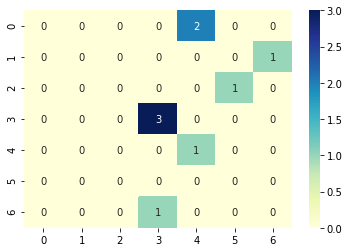

In [43]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

ramen = pd.read_csv('data/ramen-ratings.csv')
new_columns = ['Brand', 'Variety', 'Style', 'Country', 'Stars']
ramen = ramen.drop([c for c in ramen.columns if c not in new_columns], axis=1)
ramen.dropna(inplace=True)
#print(ramen.Country.unique())
#use a bitwise or (|) instead of a logical or ('or')
ramen = ramen[(ramen.Country == 'Australia') | (ramen.Country == 'Pakistan') | (ramen.Country == 'Sarawak') | (ramen.Country == 'Holland') | (ramen.Country == 'Dubai')]
ramen = ramen.apply(LabelEncoder().fit_transform)

corr = ramen.corr()
corr.style.background_gradient(cmap='coolwarm')

#this has to be in two steps
Selected_features = ['Country','Variety','Style','Stars']
X = ramen[Selected_features]
y = ramen['Brand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#fit the model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

'''
g = sns.PairGrid(ramen)
g.map(sns.scatterplot)

sns.swarmplot(x="Brand", y="Country", data=ramen)
sns.catplot(x="Brand", y="Country", kind="violin", data=ramen)
'''

#making a confusion matrix and a heatmap
cnf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
